In [6]:
from sklearn import model_selection

def evaluate_models(models, X_train, Y_train):
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        cv_results = model_selection.cross_val_score(model, 
                                                     X_train, Y_train, cv=kfold, 
                                                     scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f +/- %f" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    return results, names
        
def boxplot_algorithm_comparison(results, names):
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)

In [8]:
%matplotlib inline
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

train = pd.read_csv('dataset/train_explored.csv')
X_train = train.drop("Survived", axis =1)
Y_train = train['Survived']

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [10]:
results, names = evaluate_models(models, X_train, Y_train)

LR: 0.793508 +/- 0.024028)
KNN: 0.722859 +/- 0.038901)
CART: 0.782297 +/- 0.029123)
SVM: 0.726180 +/- 0.053050)


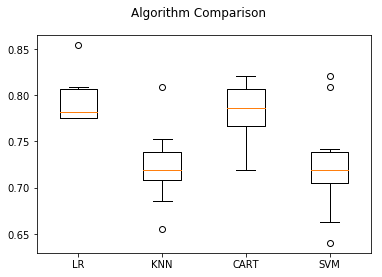

In [11]:
boxplot_algorithm_comparison(results, names)